In [ ]:
!pip install pyspark
from pyspark.sql.functions import monotonically_increasing_id, lit, col # Import necessary functions

SparkSession

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
.master("local[*]")\
.appName("Regressão com Spark")\
.getOrCreate()

spark

Carregamento dos dados

In [ ]:
dados = spark.read.csv("/content/df_test.csv", header = True)

In [ ]:
dados.show(truncate = False)

+----------+--------+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+
|date      |price   |bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone|
+----------+--------+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+
|2014-09-26|305000.0|2       |1    |False       |76.18046    |False    |False    |True             |1             |False       |True        |9    |2            |
|2014-05-14|498000.0|3       |2    |True        |210.88981   |False    |False    |False            |2             |True        |True        |5    |2            |
|2015-03-23|590000.0|2       |4    |False       |262.91549   |False    |False    |False            |2             |True        |False       |3    |2            |
|2014-07-15|775000.0|3      

In [ ]:
# prompt: Criar coluna ID

from pyspark.sql.functions import monotonically_increasing_id

dados = dados.withColumn("ID", monotonically_increasing_id())

dados.show(truncate = False)

+----------+--------+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+---+
|date      |price   |bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone|ID |
+----------+--------+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+---+
|2014-09-26|305000.0|2       |1    |False       |76.18046    |False    |False    |True             |1             |False       |True        |9    |2            |0  |
|2014-05-14|498000.0|3       |2    |True        |210.88981   |False    |False    |False            |2             |True        |True        |5    |2            |1  |
|2015-03-23|590000.0|2       |4    |False       |262.91549   |False    |False    |False            |2             |True        |False       |3    |2            |2  |
|201

Seleção de Features

In [ ]:
dataset = dados\
.select("ID", "bedrooms", "grade", "has_basement", "living_in_m2", "renovated", "nice_view", "perfect_condition", "real_bathrooms", "has_lavatory", "single_floor", "month", "quartile_zone", "price")\
.drop("date")

In [ ]:
dataset.show()

+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+--------+
| ID|bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone|   price|
+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+--------+
|  0|       2|    1|       False|    76.18046|    False|    False|             True|             1|       False|        True|    9|            2|305000.0|
|  1|       3|    2|        True|   210.88981|    False|    False|            False|             2|        True|        True|    5|            2|498000.0|
|  2|       2|    4|       False|   262.91549|    False|    False|            False|             2|        True|       False|    3|            2|590000.0|
|  3|       3|    3|       False|   159.79316|    False|    False|    

In [ ]:
dataset.count()

6700

Tratamento de Dados

In [ ]:
dataset.printSchema()

root
 |-- ID: long (nullable = false)
 |-- bedrooms: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- has_basement: string (nullable = true)
 |-- living_in_m2: string (nullable = true)
 |-- renovated: string (nullable = true)
 |-- nice_view: string (nullable = true)
 |-- perfect_condition: string (nullable = true)
 |-- real_bathrooms: string (nullable = true)
 |-- has_lavatory: string (nullable = true)
 |-- single_floor: string (nullable = true)
 |-- month: string (nullable = true)
 |-- quartile_zone: string (nullable = true)
 |-- price: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType, DoubleType, LongType, BooleanType

In [ ]:
dataset\
  .withColumn('grade', dataset['grade'].cast(IntegerType()))\
  .withColumn('bedrooms', dataset['bedrooms'].cast(IntegerType()))\
  .withColumn('has_basement', dataset['has_basement'].cast(BooleanType()))\
  .withColumn('living_in_m2', dataset['living_in_m2'].cast(DoubleType()))\
  .withColumn('renovated', dataset['renovated'].cast(BooleanType()))\
  .withColumn('nice_view', dataset['nice_view'].cast(BooleanType()))\
  .withColumn('perfect_condition', dataset['perfect_condition'].cast(BooleanType()))\
  .withColumn('real_bathrooms', dataset['real_bathrooms'].cast(IntegerType()))\
  .withColumn('has_lavatory', dataset['has_lavatory'].cast(BooleanType()))\
  .withColumn('single_floor', dataset['single_floor'].cast( BooleanType()))\
  .withColumn('month', dataset['month'].cast(IntegerType()))\
  .withColumn('quartile_zone', dataset['quartile_zone'].cast(IntegerType()))\
  .withColumn('price', dataset['price'].cast(LongType()))\
  .printSchema()

root
 |-- ID: long (nullable = false)
 |-- bedrooms: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- has_basement: boolean (nullable = true)
 |-- living_in_m2: double (nullable = true)
 |-- renovated: boolean (nullable = true)
 |-- nice_view: boolean (nullable = true)
 |-- perfect_condition: boolean (nullable = true)
 |-- real_bathrooms: integer (nullable = true)
 |-- has_lavatory: boolean (nullable = true)
 |-- single_floor: boolean (nullable = true)
 |-- month: integer (nullable = true)
 |-- quartile_zone: integer (nullable = true)
 |-- price: long (nullable = true)



In [ ]:
dataset = dataset\
  .withColumn('grade', dataset['grade'].cast(IntegerType()))\
  .withColumn('bedrooms', dataset['bedrooms'].cast(IntegerType()))\
  .withColumn('has_basement', dataset['has_basement'].cast(BooleanType()))\
  .withColumn('living_in_m2', dataset['living_in_m2'].cast(DoubleType()))\
  .withColumn('renovated', dataset['renovated'].cast(BooleanType()))\
  .withColumn('nice_view', dataset['nice_view'].cast(BooleanType()))\
  .withColumn('perfect_condition', dataset['perfect_condition'].cast(BooleanType()))\
  .withColumn('real_bathrooms', dataset['real_bathrooms'].cast(IntegerType()))\
  .withColumn('has_lavatory', dataset['has_lavatory'].cast(BooleanType()))\
  .withColumn('single_floor', dataset['single_floor'].cast( BooleanType()))\
  .withColumn('month', dataset['month'].cast(IntegerType()))\
  .withColumn('quartile_zone', dataset['quartile_zone'].cast(IntegerType()))\
  .withColumn('price', dataset['price'].cast(LongType()))

In [ ]:
dataset.show()

+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+------+
| ID|bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone| price|
+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+------+
|  0|       2|    1|       false|    76.18046|    false|    false|             true|             1|       false|        true|    9|            2|305000|
|  1|       3|    2|        true|   210.88981|    false|    false|            false|             2|        true|        true|    5|            2|498000|
|  2|       2|    4|       false|   262.91549|    false|    false|            false|             2|        true|       false|    3|            2|590000|
|  3|       3|    3|       false|   159.79316|    false|    false|            fals

In [ ]:
dataset\
.select('bedrooms')\
.groupby('bedrooms')\
.count()\
.show()

+--------+-----+
|bedrooms|count|
+--------+-----+
|       1|  995|
|       3| 2606|
|       2| 3099|
+--------+-----+



In [ ]:
dataset\
.select('grade')\
.groupby('grade')\
.count()\
.show()

+-----+-----+
|grade|count|
+-----+-----+
|    1|  791|
|    3| 1993|
|    5|  266|
|    4|  734|
|    2| 2916|
+-----+-----+



In [ ]:
dataset\
.select('has_basement')\
.groupby('has_basement')\
.count()\
.show()

+------------+-----+
|has_basement|count|
+------------+-----+
|        true| 2544|
|       false| 4156|
+------------+-----+



In [ ]:
dataset\
.select('renovated')\
.groupby('renovated')\
.count()\
.show()

+---------+-----+
|renovated|count|
+---------+-----+
|     true|  232|
|    false| 6468|
+---------+-----+



In [ ]:
dataset\
.select('nice_view')\
.groupby('nice_view')\
.count()\
.show()

+---------+-----+
|nice_view|count|
+---------+-----+
|     true|  509|
|    false| 6191|
+---------+-----+



In [ ]:
dataset\
.select('perfect_condition')\
.groupby('perfect_condition')\
.count()\
.show()

+-----------------+-----+
|perfect_condition|count|
+-----------------+-----+
|             true|  543|
|            false| 6157|
+-----------------+-----+



In [ ]:
dataset\
.select('real_bathrooms')\
.groupby('real_bathrooms')\
.count()\
.show()

+--------------+-----+
|real_bathrooms|count|
+--------------+-----+
|             1| 2815|
|             3|  571|
|             2| 3314|
+--------------+-----+



In [ ]:
dataset\
.select('has_lavatory')\
.groupby('has_lavatory')\
.count()\
.show()

+------------+-----+
|has_lavatory|count|
+------------+-----+
|        true| 4564|
|       false| 2136|
+------------+-----+



In [ ]:
dataset\
.select('month')\
.groupby('month')\
.count()\
.show()

+-----+-----+
|month|count|
+-----+-----+
|   12|  446|
|    1|  308|
|    6|  700|
|    3|  554|
|    5|  744|
|    9|  533|
|    4|  700|
|    8|  623|
|    7|  699|
|   10|  569|
|   11|  442|
|    2|  382|
+-----+-----+



In [ ]:
dataset\
.select('quartile_zone')\
.groupby('quartile_zone')\
.count()\
.show()

+-------------+-----+
|quartile_zone|count|
+-------------+-----+
|            1| 1642|
|            3| 1724|
|            4| 1380|
|            2| 1954|
+-------------+-----+



Tratamento para dados faltantes

In [ ]:
from pyspark.sql import functions as f

In [ ]:
dataset.show()

+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+------+
| ID|bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone| price|
+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+------+
|  0|       2|    1|       false|    76.18046|    false|    false|             true|             1|       false|        true|    9|            2|305000|
|  1|       3|    2|        true|   210.88981|    false|    false|            false|             2|        true|        true|    5|            2|498000|
|  2|       2|    4|       false|   262.91549|    false|    false|            false|             2|        true|       false|    3|            2|590000|
|  3|       3|    3|       false|   159.79316|    false|    false|            fals

Contagem de valores faltantes

In [ ]:
from pyspark.sql import functions as f
from pyspark.sql import types # Import the types module

dataset\
.select([f.count(f.when((f.col(c).cast("double").isNull()) | (f.isnan(f.col(c).cast("double"))), True)).alias(c) if dataset.schema[c].dataType in [types.DoubleType(), types.FloatType()]
         else f.count(f.when(f.col(c).isNull(), True)).alias(c)
         for c in dataset.columns])\
.show()

+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+-----+
| ID|bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone|price|
+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+-----+
|  0|       0|    0|           0|           0|        0|        0|                0|             0|           0|           0|    0|            0|    0|
+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+-----+



Regressão Linear

Variáveis Dummy

Preparando dados para regressão

In [ ]:
dataset.show()

+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+------+
| ID|bedrooms|grade|has_basement|living_in_m2|renovated|nice_view|perfect_condition|real_bathrooms|has_lavatory|single_floor|month|quartile_zone| price|
+---+--------+-----+------------+------------+---------+---------+-----------------+--------------+------------+------------+-----+-------------+------+
|  0|       2|    1|       false|    76.18046|    false|    false|             true|             1|       false|        true|    9|            2|305000|
|  1|       3|    2|        true|   210.88981|    false|    false|            false|             2|        true|        true|    5|            2|498000|
|  2|       2|    4|       false|   262.91549|    false|    false|            false|             2|        true|       false|    3|            2|590000|
|  3|       3|    3|       false|   159.79316|    false|    false|            fals

In [ ]:
# Renomear coluna bedrooms pra 1 quarto, 2 quartos e 3 quartos

from pyspark.sql.functions import when

# Criar uma nova coluna com base nos valores de 'bedrooms'
dataset = dataset.withColumn(
    "bedrooms_category",
     when(dataset["bedrooms"] == 1, "1 bedroom")
    .when(dataset["bedrooms"] == 2, "2 bedrooms")
    .when(dataset["bedrooms"] == 3, "3 bedrooms")
    .otherwise("Outros")  # Define um valor padrão para outros números de bedrooms
)

In [ ]:
dataset = dataset.drop("bedrooms")

In [ ]:
dataset\
  .groupBy("ID")\
  .pivot("bedrooms_category")\
  .agg(f.lit(1))\
  .na\
  .fill(0)\
  .show()

+----+---------+----------+----------+
|  ID|1 bedroom|2 bedrooms|3 bedrooms|
+----+---------+----------+----------+
|2040|        0|         1|         0|
|1697|        0|         0|         1|
|2509|        0|         0|         1|
|1950|        0|         0|         1|
|5556|        0|         0|         1|
|4894|        0|         0|         1|
| 474|        0|         0|         1|
|3764|        0|         1|         0|
|2214|        0|         1|         0|
|2250|        1|         0|         0|
|  26|        0|         0|         1|
|4590|        0|         1|         0|
|5409|        0|         1|         0|
|4823|        0|         0|         1|
| 964|        0|         1|         0|
|3506|        0|         0|         1|
|5385|        0|         0|         1|
|2529|        0|         1|         0|
|1806|        0|         1|         0|
|2453|        0|         1|         0|
+----+---------+----------+----------+
only showing top 20 rows



In [ ]:
bedrooms_category = dataset\
                    .groupBy("ID")\
                    .pivot("bedrooms_category")\
                    .agg(f.lit(1))\
                    .na\
                    .fill(0)

In [ ]:
dataset = dataset.drop("bedrooms_category")

In [ ]:
# Renomear coluna grade pra 1 grade, 2 grades e 3 grades

from pyspark.sql.functions import when

# Criar uma nova coluna com base nos valores de 'bedrooms'
dataset = dataset.withColumn(
    "grades_category",
     when(dataset["grade"] == 1, "1 grade")
    .when(dataset["grade"] == 2, "2 grades")
    .when(dataset["grade"] == 3, "3 grades")
    .when(dataset["grade"] == 4, "4 grades")
    .when(dataset["grade"] == 5, "5 grades")

    .otherwise("Outros")  # Define um valor padrão para outros números de grades
)

In [ ]:
dataset = dataset.drop("grade")

In [ ]:
dataset\
  .groupBy("ID")\
  .pivot("grades_category")\
  .agg(f.lit(1))\
  .na\
  .fill(0)\
  .show()

+----+-------+--------+--------+--------+--------+
|  ID|1 grade|2 grades|3 grades|4 grades|5 grades|
+----+-------+--------+--------+--------+--------+
|2509|      0|       0|       1|       0|       0|
|5385|      0|       0|       1|       0|       0|
| 474|      0|       0|       0|       1|       0|
|  26|      0|       0|       0|       1|       0|
|2040|      0|       1|       0|       0|       0|
|2453|      0|       0|       0|       1|       0|
|4823|      0|       0|       0|       0|       1|
|2214|      1|       0|       0|       0|       0|
|5409|      0|       1|       0|       0|       0|
|5556|      0|       0|       1|       0|       0|
| 964|      0|       1|       0|       0|       0|
|2529|      1|       0|       0|       0|       0|
|4894|      0|       0|       0|       0|       1|
|  29|      0|       0|       1|       0|       0|
|3091|      0|       1|       0|       0|       0|
|1806|      0|       1|       0|       0|       0|
|3506|      0|       1|       0

In [ ]:
grade_category = dataset\
                  .groupBy("ID")\
                  .pivot("grades_category")\
                  .agg(f.lit(1))\
                  .na\
                  .fill(0)


In [ ]:
dataset = dataset.drop("grades_category")


In [ ]:
from pyspark.sql.functions import when

dataset = dataset.withColumn(
    "has_basement",
    when(dataset["has_basement"], 1).otherwise(0)
)

In [ ]:
dataset = dataset.withColumn(
    "renovated",
    when(dataset["renovated"], 1).otherwise(0)
)

In [ ]:
dataset = dataset.withColumn(
    "nice_view",
    when(dataset["nice_view"], 1).otherwise(0)
)

In [ ]:
dataset = dataset.withColumn(
    "perfect_condition",
    when(dataset["perfect_condition"], 1).otherwise(0)
)

In [ ]:
# Renomear coluna real_bedrooms pra 1 real bathroom, 2 real bathrooms e 3 real bathrooms

from pyspark.sql.functions import when

# Criar uma nova coluna com base nos valores de 'real_bedrooms'
dataset = dataset.withColumn(
    "real_bathrooms_category",
     when(dataset["real_bathrooms"] == 1, "1 real bathroom")
    .when(dataset["real_bathrooms"] == 2, "2 real bathrooms")
    .when(dataset["real_bathrooms"] == 3, "3 real bathrooms")

    .otherwise("Outros")  # Define um valor padrão para outros números de grades
)

In [ ]:
dataset = dataset.drop("real_bathrooms")

In [ ]:
dataset\
  .groupBy("ID")\
  .pivot("real_bathrooms_category")\
  .agg(f.lit(1))\
  .na\
  .fill(0)\
  .show()

+----+---------------+----------------+----------------+
|  ID|1 real bathroom|2 real bathrooms|3 real bathrooms|
+----+---------------+----------------+----------------+
|  29|              0|               1|               0|
| 474|              0|               1|               0|
|2453|              0|               1|               0|
| 964|              1|               0|               0|
|  26|              0|               1|               0|
|1950|              0|               1|               0|
|3506|              0|               0|               1|
|4894|              0|               1|               0|
|2529|              1|               0|               0|
|1697|              0|               1|               0|
|1806|              1|               0|               0|
|2927|              0|               1|               0|
|5409|              0|               1|               0|
|5385|              0|               1|               0|
|4823|              0|         

In [ ]:
real_bathrooms_category = dataset\
                          .groupBy("ID")\
                          .pivot("real_bathrooms_category")\
                          .agg(f.lit(1))\
                          .na\
                          .fill(0)

In [ ]:
dataset = dataset.drop("real_bathrooms_category")

In [ ]:
dataset = dataset.withColumn(
    "single_floor",
    when(dataset["single_floor"], 1).otherwise(0)
)

In [ ]:
dataset = dataset.withColumn(
    "has_lavatory",
    when(dataset["has_lavatory"], 1).otherwise(0)
)

In [ ]:
# Renomear coluna month pra Janeiro, Fevereiro, Março, Abril, Maio, Junho,
# Julho, Agosto, Setembro, Outubro, Novembro e Dezembro.

from pyspark.sql.functions import when

# Criar uma nova coluna com base nos valores de 'real_bedrooms'
dataset = dataset.withColumn(
    "month_category",
     when(dataset["month"] == 1, "Janeiro")
    .when(dataset["month"] == 2, "Fevereiro")
    .when(dataset["month"] == 3, "Março")
    .when(dataset["month"] == 4, "Abril")
    .when(dataset["month"] == 5, "Maio")
    .when(dataset["month"] == 6, "Junho")
    .when(dataset["month"] == 7, "Julho")
    .when(dataset["month"] == 8, "Agosto")
    .when(dataset["month"] == 9, "Setembro")
    .when(dataset["month"] == 10, "Outubro")
    .when(dataset["month"] == 11, "Novembro")
    .when(dataset["month"] == 12, "Dezembro")

    .otherwise("Outros")  # Define um valor padrão para outros números de grades
)

In [ ]:
dataset = dataset.drop("month")

In [ ]:
dataset\
  .groupBy("ID")\
  .pivot("month_category")\
  .agg(f.lit(1))\
  .na\
  .fill(0)\
  .show()

+----+-----+------+--------+---------+-------+-----+-----+----+-----+--------+-------+--------+
|  ID|Abril|Agosto|Dezembro|Fevereiro|Janeiro|Julho|Junho|Maio|Março|Novembro|Outubro|Setembro|
+----+-----+------+--------+---------+-------+-----+-----+----+-----+--------+-------+--------+
|3506|    0|     0|       0|        0|      0|    0|    0|   0|    0|       0|      1|       0|
|4894|    0|     0|       0|        0|      1|    0|    0|   0|    0|       0|      0|       0|
|5385|    0|     0|       0|        0|      0|    0|    0|   1|    0|       0|      0|       0|
|  29|    1|     0|       0|        0|      0|    0|    0|   0|    0|       0|      0|       0|
|1806|    0|     0|       0|        0|      0|    0|    0|   1|    0|       0|      0|       0|
|1677|    0|     1|       0|        0|      0|    0|    0|   0|    0|       0|      0|       0|
|4823|    0|     0|       0|        0|      0|    0|    0|   1|    0|       0|      0|       0|
|1950|    0|     1|       0|        0|  

In [ ]:
month_category = dataset\
                .groupBy("ID")\
                .pivot("month_category")\
                .agg(f.lit(1))\
                .na\
                .fill(0)

In [ ]:
dataset = dataset.drop("month_category")

In [ ]:
# Renomear coluna real_bedrooms pra 1 real bathroom, 2 real bathrooms e 3 real bathrooms

from pyspark.sql.functions import when

# Criar uma nova coluna com base nos valores de 'real_bedrooms'
dataset = dataset.withColumn(
    "quartile_zone_category",
     when(dataset["quartile_zone"] == 1, "1 quartile zone")
    .when(dataset["quartile_zone"] == 2, "2 quartiles zones")
    .when(dataset["quartile_zone"] == 3, "3 quartiles zones")
    .when(dataset["quartile_zone"] == 4, "4 quartiles zones")

    .otherwise("Outros")  # Define um valor padrão para outros números de grades
)

In [ ]:
dataset = dataset.drop("quartile_zone")

In [ ]:
dataset\
  .groupBy("ID")\
  .pivot("quartile_zone_category")\
  .agg(f.lit(1))\
  .na\
  .fill(0)\
  .show()

+----+---------------+-----------------+-----------------+-----------------+
|  ID|1 quartile zone|2 quartiles zones|3 quartiles zones|4 quartiles zones|
+----+---------------+-----------------+-----------------+-----------------+
|1677|              0|                1|                0|                0|
|5385|              0|                0|                0|                1|
|4894|              0|                0|                0|                1|
|5556|              0|                1|                0|                0|
|2250|              1|                0|                0|                0|
|4823|              0|                0|                0|                1|
|2453|              0|                0|                0|                1|
|2509|              0|                0|                0|                1|
|3091|              0|                0|                1|                0|
|3764|              1|                0|                0|                0|

In [ ]:
quartile_zone_category = dataset\
                        .groupBy("ID")\
                        .pivot("quartile_zone_category")\
                        .agg(f.lit(1))\
                        .na\
                        .fill(0)

In [ ]:
dataset = dataset.drop("quartile_zone_category")

In [ ]:
dataset = dataset\
  .join(bedrooms_category, on = "ID", how = "inner")\
  .join(grade_category, on = "ID", how = "inner")\
  .join(real_bathrooms_category, on = "ID", how = "inner")\
  .join(month_category, on = "ID", how = "inner")\
  .join(quartile_zone_category, on = "ID", how = "inner")

In [ ]:
dataset.show()

+----+------------+------------------+---------+---------+-----------------+------------+------------+------+---------+----------+----------+-------+--------+--------+--------+--------+---------------+----------------+----------------+-----+------+--------+---------+-------+-----+-----+----+-----+--------+-------+--------+---------------+-----------------+-----------------+-----------------+
|  ID|has_basement|      living_in_m2|renovated|nice_view|perfect_condition|has_lavatory|single_floor| price|1 bedroom|2 bedrooms|3 bedrooms|1 grade|2 grades|3 grades|4 grades|5 grades|1 real bathroom|2 real bathrooms|3 real bathrooms|Abril|Agosto|Dezembro|Fevereiro|Janeiro|Julho|Junho|Maio|Março|Novembro|Outubro|Setembro|1 quartile zone|2 quartiles zones|3 quartiles zones|4 quartiles zones|
+----+------------+------------------+---------+---------+-----------------+------------+------------+------+---------+----------+----------+-------+--------+--------+--------+--------+---------------+---------

Vetorização dos dados

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
dataset = dataset.withColumnRenamed("price", "label")

In [ ]:
X = ['has_basement',
     'living_in_m2',
     'renovated',
     'nice_view',
     'perfect_condition',
     'has_lavatory',
     'single_floor',
     '1 bedroom',
     '2 bedrooms',
     '3 bedrooms',
     '1 grade',
     '2 grades',
     '3 grades',
     '4 grades',
     '5 grades',
     '1 real bathroom',
     '2 real bathrooms',
     '3 real bathrooms',
     'Janeiro',
     'Fevereiro',
     'Março',
     'Abril',
     'Maio',
     'Junho',
     'Julho',
     'Agosto',
     'Setembro',
     'Outubro',
     'Novembro',
     'Dezembro',
     '1 quartile zone',
     '2 quartiles zones',
     '3 quartiles zones',
     '4 quartiles zones'
]

In [ ]:
assembler = VectorAssembler(inputCols = X, outputCol = "features")

In [ ]:
dataset_prep = assembler.transform(dataset).select("features", "label")

In [ ]:
dataset_prep.show(10, truncate = False)

+---------------------------------------------------------------------+------+
|features                                                             |label |
+---------------------------------------------------------------------+------+
|(34,[1,8,11,15,21,32],[103.12233,1.0,1.0,1.0,1.0,1.0])               |560000|
|(34,[1,6,9,10,16,23,31],[123.56099,1.0,1.0,1.0,1.0,1.0,1.0])         |235867|
|(34,[1,9,12,15,25,33],[163.50928,1.0,1.0,1.0,1.0,1.0])               |780500|
|(34,[1,9,12,16,25,32],[267.56064,1.0,1.0,1.0,1.0,1.0])               |780000|
|(34,[1,5,9,12,16,21,31],[171.87055,1.0,1.0,1.0,1.0,1.0,1.0])         |515000|
|(34,[0,1,5,9,14,16,18,33],[1.0,360.46364,1.0,1.0,1.0,1.0,1.0,1.0])   |917500|
|(34,[1,5,9,13,16,28,30],[239.503934,1.0,1.0,1.0,1.0,1.0,1.0])        |400950|
|(34,[1,6,8,11,15,21,30],[128.20614,1.0,1.0,1.0,1.0,1.0,1.0])         |300000|
|(34,[1,6,8,10,15,20,30],[91.97397,1.0,1.0,1.0,1.0,1.0,1.0])          |210490|
|(34,[1,6,7,10,15,22,30],[122.63195999999999,1.0,1.0

Exploração de dados

In [ ]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [ ]:
correlacao = Correlation.corr(dataset_prep, "features").collect()

In [ ]:
correlacao

[Row(pearson(features)=DenseMatrix(34, 34, [1.0, 0.1624, 0.0234, 0.1494, 0.1035, 0.1043, 0.2769, -0.0716, ..., 0.0017, -0.0069, 0.0059, 0.012, -0.2902, -0.3268, -0.2998, 1.0], False))]

In [ ]:
correlacao = Correlation.corr(dataset_prep, "features").collect()[0][0]

In [ ]:
correlacao

DenseMatrix(34, 34, [1.0, 0.1624, 0.0234, 0.1494, 0.1035, 0.1043, 0.2769, -0.0716, ..., 0.0017, -0.0069, 0.0059, 0.012, -0.2902, -0.3268, -0.2998, 1.0], False)

In [ ]:
import numpy as np
from pyspark.ml.linalg import DenseMatrix

correlacao_np = correlacao
# Converte matriz densa para numpy array
correlacao_np = correlacao_np.toArray()
correlacao_list = correlacao_np.tolist()  # Converte para lista

In [ ]:
import pandas as pd
import numpy as np

# # Remodelar a matriz para corresponder ao formato esperado da matriz de correlação
num_features = len(X)

# Converte matriz densa para numpy array
correlacao_np = correlacao.toArray()
correlacao_np = correlacao_np.reshape((num_features, num_features))  # Remodelar para 34x34

dataframe_correlacao = pd.DataFrame(correlacao_np, columns=X, index=X)

In [ ]:
dataframe_correlacao

,has_basement,living_in_m2,renovated,nice_view,perfect_condition,has_lavatory,single_floor,1 bedroom,2 bedrooms,3 bedrooms,...,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,1 quartile zone,2 quartiles zones,3 quartiles zones,4 quartiles zones
has_basement,1.000000,0.162362,0.023397,0.149426,0.103476,0.104299,0.276929,-0.071612,-0.031886,0.084846,...,-0.005444,-0.006941,0.013205,-0.006675,-0.005982,-0.005363,-0.096145,-0.045968,0.122688,0.021302
living_in_m2,0.162362,1.000000,0.048262,0.144122,-0.023513,0.409465,-0.387008,-0.427152,-0.238297,0.555288,...,0.015976,0.014217,0.017674,-0.016222,-0.014001,-0.007259,-0.119681,-0.045392,-0.042760,0.224532
renovated,0.023397,0.048262,1.000000,0.062777,-0.029322,-0.035100,-0.033424,-0.007929,-0.010329,0.016347,...,-0.000545,-0.001609,0.004658,0.024297,0.008863,-0.004728,-0.016810,0.000609,0.030445,-0.015715
nice_view,0.149426,0.144122,0.062777,1.000000,0.015994,0.036594,0.014544,-0.004103,-0.019695,0.023135,...,-0.018618,0.014879,0.017712,-0.006521,-0.003583,-0.026854,-0.025857,-0.024101,0.058024,-0.008133
perfect_condition,0.103476,-0.023513,-0.029322,0.015994,1.000000,-0.051507,0.096732,-0.036357,-0.014433,0.041281,...,0.018517,0.016025,0.007687,-0.017881,0.022425,-0.000320,-0.034426,0.009191,0.027872,-0.003843
has_lavatory,0.104299,0.409465,-0.035100,0.036594,-0.051507,1.000000,-0.271793,-0.298829,0.012192,0.205503,...,0.014506,0.011708,0.017663,0.000460,-0.022047,0.001526,-0.039852,-0.047249,-0.025187,0.122717
single_floor,0.276929,-0.387008,-0.033424,0.014544,0.096732,-0.271793,1.000000,0.183625,0.111555,-0.248031,...,-0.015566,0.015632,-0.011539,-0.003206,-0.000718,0.009996,0.117679,0.047200,-0.088626,-0.082410
1 bedroom,-0.071612,-0.427152,-0.007929,-0.004103,-0.036357,-0.298829,0.183625,1.000000,-0.387421,-0.333194,...,-0.009346,0.012256,-0.009546,-0.000754,0.031044,0.006341,-0.032054,-0.018638,0.097907,-0.050793
2 bedrooms,-0.031886,-0.238297,-0.010329,-0.019695,-0.014433,0.012192,0.111555,-0.387421,1.000000,-0.740138,...,-0.003245,-0.012535,-0.002801,0.027722,-0.021033,0.000851,0.044898,0.029770,-0.024251,-0.054999
3 bedrooms,0.084846,0.555288,0.016347,0.023135,0.041281,0.205503,-0.248031,-0.333194,-0.740138,1.000000,...,0.010136,0.003880,0.009828,-0.027802,-0.001132,-0.005495,-0.022538,-0.016852,-0.046613,0.093299


Mapa de calor

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

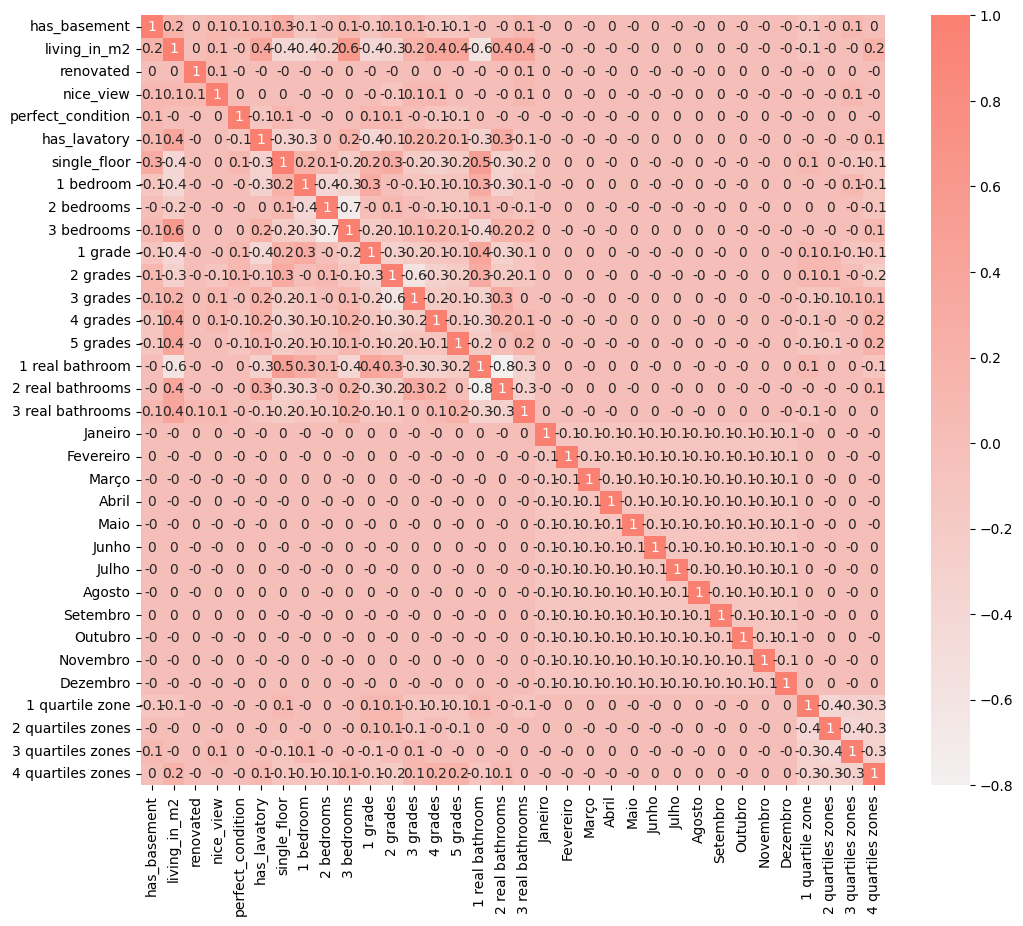

In [ ]:
plt.figure(figsize = (12, 10))
paleta = sns.color_palette("light:salmon", as_cmap = True)
sns.heatmap(dataframe_correlacao.round(1), annot = True, cmap = paleta)

Ajuste e Previsão

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed = 101)

In [ ]:
treino.count()

4689

In [ ]:
teste.count()

2011

In [ ]:
lr = LinearRegression()

In [ ]:
modelo_lr = lr.fit(treino)

In [ ]:
previsoes_lr_treino = modelo_lr.transform(treino)

In [ ]:
previsoes_lr_treino.show()

+--------------------+-------+-----------------+
|            features|  label|       prediction|
+--------------------+-------+-----------------+
|(34,[0,1,2,3,4,5,...| 835000|699833.2529778669|
|(34,[0,1,2,3,5,6,...| 503000|593383.2946059058|
|(34,[0,1,2,3,5,6,...| 550000|738018.1557233301|
|(34,[0,1,2,3,5,6,...| 900000|663507.8239520056|
|(34,[0,1,2,3,5,6,...| 630000|677397.2110888949|
|(34,[0,1,2,3,5,6,...|1135000| 914683.712724058|
|(34,[0,1,2,3,5,7,...| 655000|530455.8258774832|
|(34,[0,1,2,3,5,7,...| 787500|514360.6192643516|
|(34,[0,1,2,3,5,8,...| 818000| 726890.426002627|
|(34,[0,1,2,3,5,8,...| 667000|633997.4624870126|
|(34,[0,1,2,3,5,8,...|1101000|848551.4233084763|
|(34,[0,1,2,3,5,9,...| 550000|843838.5818863783|
|(34,[0,1,2,3,8,11...| 283000|425348.7822636355|
|(34,[0,1,2,3,9,11...| 400000|617578.8560565391|
|(34,[0,1,2,3,9,13...| 991700|844256.3320932596|
|(34,[0,1,2,4,5,6,...| 456700|504336.9067156958|
|(34,[0,1,2,4,5,9,...| 614000| 661393.734039178|
|(34,[0,1,2,4,9,12..

Métricas

In [ ]:
resumo_treino = modelo_lr.summary

In [ ]:
resumo_treino.r2

0.7553031544990167

In [ ]:
resumo_treino.rootMeanSquaredError

103430.46900042251

In [ ]:
resumo_teste = modelo_lr.evaluate(teste)

In [ ]:
resumo_teste.r2

0.7405255140943134

In [ ]:
resumo_teste.rootMeanSquaredError

104693.22813947001

Tabela Resumo Regressão Linear

In [ ]:
print("Linear Regression")
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)

Linear Regression
Dados de Treino
R²: 0.755303
RMSE: 103430.469000

Dados de Teste
R²: 0.740526
RMSE: 104693.228139


Prevendo resultados

In [ ]:
dataset.show(15)

+----+------------+------------------+---------+---------+-----------------+------------+------------+------+---------+----------+----------+-------+--------+--------+--------+--------+---------------+----------------+----------------+-----+------+--------+---------+-------+-----+-----+----+-----+--------+-------+--------+---------------+-----------------+-----------------+-----------------+
|  ID|has_basement|      living_in_m2|renovated|nice_view|perfect_condition|has_lavatory|single_floor| label|1 bedroom|2 bedrooms|3 bedrooms|1 grade|2 grades|3 grades|4 grades|5 grades|1 real bathroom|2 real bathrooms|3 real bathrooms|Abril|Agosto|Dezembro|Fevereiro|Janeiro|Julho|Junho|Maio|Março|Novembro|Outubro|Setembro|1 quartile zone|2 quartiles zones|3 quartiles zones|4 quartiles zones|
+----+------------+------------------+---------+---------+-----------------+------------+------------+------+---------+----------+----------+-------+--------+--------+--------+--------+---------------+---------

In [ ]:
X

['has_basement',
 'living_in_m2',
 'renovated',
 'nice_view',
 'perfect_condition',
 'has_lavatory',
 'single_floor',
 '1 bedroom',
 '2 bedrooms',
 '3 bedrooms',
 '1 grade',
 '2 grades',
 '3 grades',
 '4 grades',
 '5 grades',
 '1 real bathroom',
 '2 real bathrooms',
 '3 real bathrooms',
 'Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro',
 '1 quartile zone',
 '2 quartiles zones',
 '3 quartiles zones',
 '4 quartiles zones']

In [ ]:
novo_imovel = [{
 'has_basement':2,
 'living_in_m2':103,
 'renovated':1,
 'nice_view':1,
 'perfect_condition':1,
 'has_lavatory':1,
 'single_floor':1 ,
 '1 bedroom':0 ,
 '2 bedrooms':0,
 '3 bedrooms':1,
 '1 grade':0,
 '2 grades':0,
 '3 grades':1,
 '4 grades':0,
 '5 grades':0,
 '1 real bathroom':1,
 '2 real bathrooms':0,
 '3 real bathrooms':0,
 'Janeiro':1,
 'Fevereiro':0,
 'Março':0,
 'Abril':0,
 'Maio':0,
 'Junho':0,
 'Julho':0,
 'Agosto':0,
 'Setembro':0,
 'Outubro':0,
 'Novembro':0,
 'Dezembro':0,
 '1 quartile zone':0,
 '2 quartiles zones':0,
 '3 quartiles zones':1,
 '4 quartiles zones':0,
 'label':0}]

In [ ]:
meu_imovel = spark.createDataFrame(novo_imovel)

In [ ]:
meu_imovel.show()

+---------+-------+---------------+---------------+----------+--------+-----------------+----------------+----------+--------+-----------------+----------------+--------+-----------------+--------+-----+------+--------+---------+-------+-----+-----+----+-----+--------+-------+--------+------------+------------+-----+------------+---------+-----------------+---------+------------+
|1 bedroom|1 grade|1 quartile zone|1 real bathroom|2 bedrooms|2 grades|2 quartiles zones|2 real bathrooms|3 bedrooms|3 grades|3 quartiles zones|3 real bathrooms|4 grades|4 quartiles zones|5 grades|Abril|Agosto|Dezembro|Fevereiro|Janeiro|Julho|Junho|Maio|Março|Novembro|Outubro|Setembro|has_basement|has_lavatory|label|living_in_m2|nice_view|perfect_condition|renovated|single_floor|
+---------+-------+---------------+---------------+----------+--------+-----------------+----------------+----------+--------+-----------------+----------------+--------+-----------------+--------+-----+------+--------+---------+-----

In [ ]:
assembler = VectorAssembler(inputCols = X, outputCol = "features")

In [ ]:
meu_lar_vetorizado = assembler.transform(meu_imovel).select("features", "label")

In [ ]:
meu_lar_vetorizado.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(34,[0,1,2,3,4,5,...|    0|
+--------------------+-----+



In [ ]:
# prompt: Prever price do meu_lar_vetorizado

previsao = modelo_lr.transform(meu_lar_vetorizado)
print(f"O preço previsto para o imóvel é de: {previsao.select('prediction').collect()[0][0]}")


O preço previsto para o imóvel é de: 696578.9440787211
